# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [2]:
print(f"The objective is to predict the price of a used car based on various input features such as make, model, year, mileage, and condition. Using historical data, we aim to build predictive models that can quantify the relationship between these features and car prices. By analyzing feature importance and model performance, we can identify the most significant variables that drive price variation, providing actionable insights for the dealership to improve pricing and inventory strategies.")

The objective is to predict the price of a used car based on various input features such as make, model, year, mileage, and condition. Using historical data, we aim to build predictive models that can quantify the relationship between these features and car prices. By analyzing feature importance and model performance, we can identify the most significant variables that drive price variation, providing actionable insights for the dealership to improve pricing and inventory strategies.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
print(
    "1. Load the dataset – View the number of rows, columns, and column names.\n"
    "2. Check data types – Identify which features are numerical, categorical, or text.\n"
    "3. Look at summary statistics – Use mean, median, and range to understand numeric columns like price and mileage.\n"
    "4. Check for missing values – Find out which columns have missing data and how much.\n"
    "5. Find and handle outliers – Look for unusually high or low values in key columns like price.\n"
    "6. Spot duplicates – Remove any repeated rows if necessary.\n"
    "7. Explore feature relationships – Use plots or group summaries to see how features relate to price.\n"
    "8. Look for inconsistent entries – Check for typos or irregular entries in categorical fields like make or model."
)

1. Load the dataset – View the number of rows, columns, and column names.
2. Check data types – Identify which features are numerical, categorical, or text.
3. Look at summary statistics – Use mean, median, and range to understand numeric columns like price and mileage.
4. Check for missing values – Find out which columns have missing data and how much.
5. Find and handle outliers – Look for unusually high or low values in key columns like price.
6. Spot duplicates – Remove any repeated rows if necessary.
7. Explore feature relationships – Use plots or group summaries to see how features relate to price.
8. Look for inconsistent entries – Check for typos or irregular entries in categorical fields like make or model.


In [4]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.inspection import permutation_importance
# from ydata_profiling import ProfileReport
# from sklearn.feature_selection import SequentialFeatureSelector

import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

set_config(display="diagram")
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('data/vehicles.csv')
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

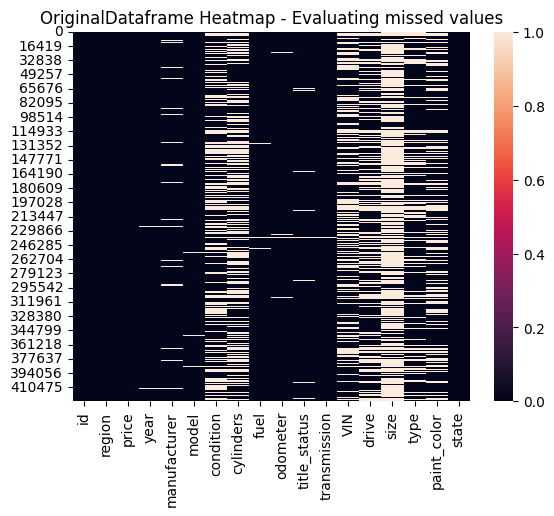

In [7]:
a = sns.heatmap(
	data.isna()
)
a.set_title("OriginalDataframe Heatmap - Evaluating missed values")
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [8]:
df_clean = data.loc[data['price'] > 0].copy()

In [9]:
cols_to_drop = ['id', 'VIN', 'region', 'size', 'paint_color', 'drive']
df_clean.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [10]:
df_clean['year'].fillna(df_clean['year'].mode().iloc[0], inplace=True)
df_clean['year'] = df_clean['year'].astype(int)
df_clean['manufacturer'].fillna('unknown', inplace=True)
df_clean['model'].fillna('unknown', inplace=True)
df_clean['condition'].fillna(df_clean['condition'].mode().iloc[0], inplace=True)
df_clean['cylinders'] = df_clean['cylinders'].str.replace(' cylinders', '', regex=False)
df_clean['cylinders'] = df_clean['cylinders'].replace('other', np.nan)
df_clean['cylinders'] = pd.to_numeric(df_clean['cylinders'], errors='coerce')
df_clean['cylinders'].fillna(df_clean['cylinders'].mode().iloc[0], inplace=True)

df_clean['fuel'].fillna('unknown', inplace=True)
df_clean['odometer'].fillna(df_clean['odometer'].median(), inplace=True)
df_clean['title_status'].fillna(df_clean['title_status'].mode().iloc[0], inplace=True)
df_clean['transmission'].fillna('unknown', inplace=True)
df_clean['type'].fillna('unknown', inplace=True)

In [11]:
def extract_primary_model(row):
    # Remove hyphens and split by space or punctuation
    model_clean = row['model'].replace('-', ' ')
    tokens = re.split(r'[ ,!?:]+', model_clean.strip())
    # Skip manufacturer name if it is first token
    if tokens and tokens[0].lower() == row['manufacturer'].lower():
        tokens.pop(0)
    return tokens[0].title() if tokens else 'Unknown'

df_clean['model'] = df_clean.apply(extract_primary_model, axis=1)
df_clean = df_clean[~((df_clean['year'] < 1948) & (df_clean['transmission'] == 'automatic'))]
df_clean.drop_duplicates(inplace=True)
print(df_clean.sample(10))


        price  year   manufacturer     model  condition  cylinders fuel  \
241652  32900  2018  mercedes-benz       Glc  excellent        4.0  gas   
230454  39590  2017      chevrolet    Camaro       good        8.0  gas   
85056    7495  2010           jeep   Liberty  excellent        6.0  gas   
36317    6999  2009        unknown  Scion/Tc  excellent        4.0  gas   
342069  13900  2008           ford      F350       good        6.0  gas   
387726  22995  2013         toyota    Tacoma  excellent        6.0  gas   
348256  18500  2014           jeep     Grand       good        6.0  gas   
137462   6995  2007        mercury   Mariner       good        6.0  gas   
62988    6425  2012        unknown     Focus  excellent        4.0  gas   
420671   4500  2005      chevrolet  Suburban       fair        8.0  gas   

        odometer title_status transmission     type state  
241652   16329.0        clean    automatic      SUV    nc  
230454   10496.0        clean        other    coupe   

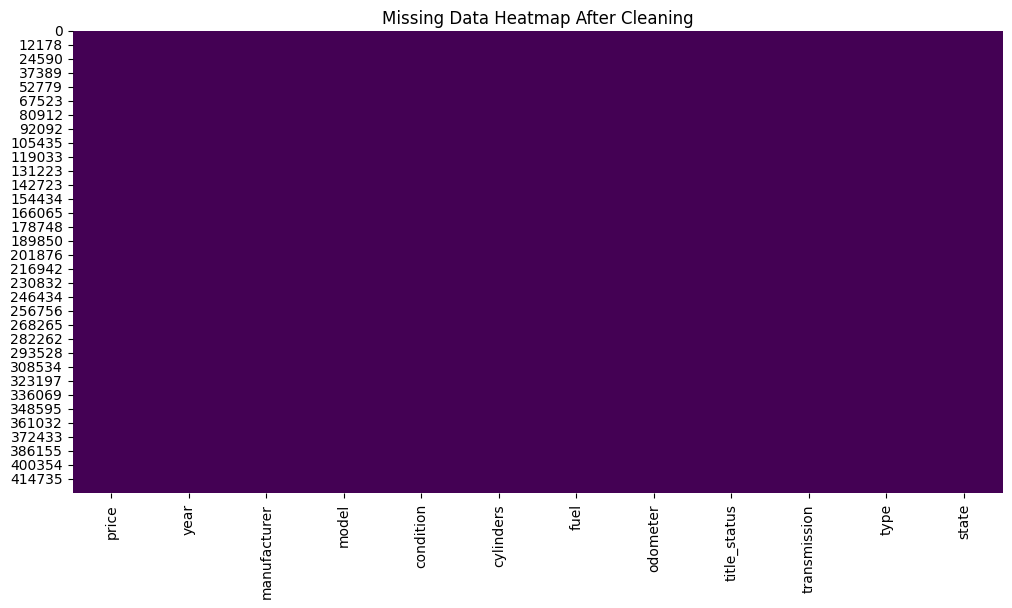

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_clean.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap After Cleaning")
plt.show()

In [13]:
def detect_outliers_iqr(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"IQR outlier boundaries for {column_name}: lower = {lower_bound}, upper = {upper_bound}")
    return lower_bound, upper_bound

lower_price, upper_price = detect_outliers_iqr(df_clean, 'price')

IQR outlier boundaries for price: lower = -21250.0, upper = 52750.0


In [14]:
price_lower_bound = max(lower_price, 100)   # Avoid negative or too low values
price_upper_bound = min(upper_price, 70000) # Cap upper bound for practicality

df_no_outliers = df_clean[(df_clean['price'] >= price_lower_bound) & (df_clean['price'] <= price_upper_bound)].copy()

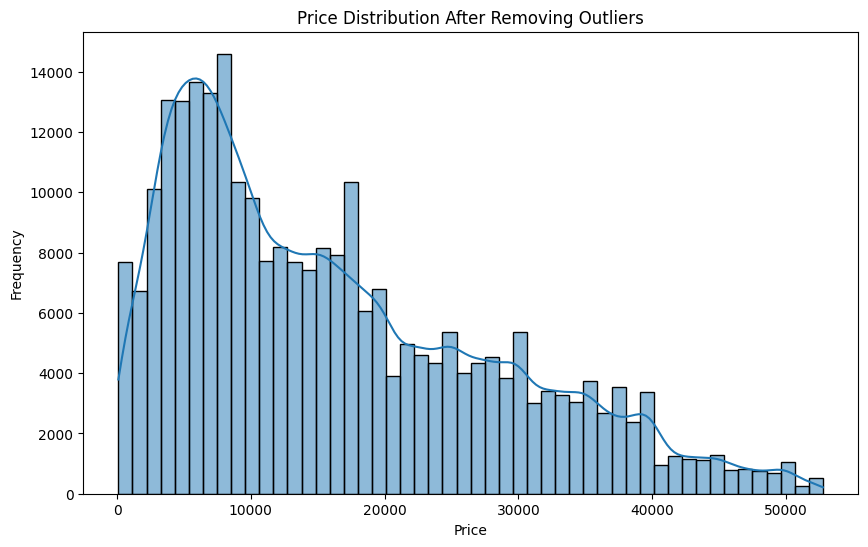

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['price'], bins=50, kde=True)
plt.title("Price Distribution After Removing Outliers")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [16]:
model_performance = []


predictors = df_no_outliers.drop(columns='price')
target = df_no_outliers['price']

X_train, X_test, y_train, y_test = train_test_split(
    predictors, target, test_size=0.3, random_state=42
)

regression_features = predictors.columns

categorical_features = df_no_outliers.select_dtypes(include='object').columns
categorical_features

Index(['manufacturer', 'model', 'condition', 'fuel', 'title_status',
       'transmission', 'type', 'state'],
      dtype='object')

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate input features and target
X_raw = df_no_outliers.drop(columns='price')
y_raw = df_no_outliers['price']

# Identify categorical and numerical columns
categorical_cols = X_raw.select_dtypes(include='object').columns
numerical_cols = X_raw.select_dtypes(exclude='object').columns

# Set up column transformer for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical features as-is
)

# Transform the features
X_transformed = preprocessor.fit_transform(X_raw)

# Split the data
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_transformed, y_raw, test_size=0.3, random_state=42
)

# Fit linear regression model
linreg_model = LinearRegression()
linreg_model.fit(X_train_split, y_train_split)

# Predict on train and test sets
y_pred_train = linreg_model.predict(X_train_split)
y_pred_test = linreg_model.predict(X_test_split)

# Calculate performance metrics
train_mse_val = mean_squared_error(y_train_split, y_pred_train)
test_mse_val = mean_squared_error(y_test_split, y_pred_test)

train_r2_val = r2_score(y_train_split, y_pred_train)
test_r2_val = r2_score(y_test_split, y_pred_test)

# Record model results
model_performance.append({
    'model': 'LinearRegression_OneHot',
    'train_mse': train_mse_val,
    'test_mse': test_mse_val,
    'train_r2': train_r2_val,
    'test_r2': test_r2_val
})


In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Column transformer
column_transformer = make_column_transformer(
    (OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    (PolynomialFeatures(), make_column_selector(dtype_include=np.number))
)

# Pipeline with StandardScaler adjusted for sparse matrix
pipeline = Pipeline([
    ('transformer', column_transformer),
    ('scaler', StandardScaler(with_mean=False)),  # <-- Fix here
    ('regressor', LinearRegression())
])

# Grid search over polynomial degrees
param_grid = {
    'transformer__polynomialfeatures__degree': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid)

# Fit the model
grid_search.fit(X_train[regression_features], y_train)


,estimator,Pipeline(step...egression())])
,param_grid,"{'transformer__polynomialfeatures__degree': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('onehotencoder', ...), ('polynomialfeatures', ...)]"


In [19]:
pred_train = grid_search.best_estimator_.predict(X_train[regression_features])
pred_test = grid_search.best_estimator_.predict(X_test[regression_features])

# Evaluating the errors
train_mse = mean_squared_error(y_train, pred_train)
test_mse = mean_squared_error(y_test, pred_test)

train_r2 = r2_score(y_train, pred_train)
test_r2 = r2_score(y_test, pred_test)

# Reporting results for this regression model
reg_results = {
    'model': 'linearRegressionWithPF',
    'train_mse': train_mse,
    'test_mse': test_mse,
    'train_r2': train_r2,
    'test_r2': test_r2
}
model_performance.append(reg_results)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Column transformer: apply PolynomialFeatures to numeric columns, OneHotEncoder to categoricals
column_transformer = make_column_transformer(
    (PolynomialFeatures(include_bias=False), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols)
)

# Lasso regression pipeline
pipeline = Pipeline([
    ('transformer', column_transformer),
    ('scaler', StandardScaler(with_mean=False)),  # with_mean=False needed for sparse matrix
    ('lasso', Lasso(random_state=42, max_iter=10))  # max_iter for convergence
])

# Grid search over polynomial degrees
param_grid = {
    'transformer__polynomialfeatures__degree': [1, 2, 3]  # limit to avoid memory issues
}

# Grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid)

# Fit the model
grid_search.fit(X_train[regression_features], y_train)


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'transformer__polynomialfeatures__degree': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('polynomialfeatures', ...), ('onehotencoder', ...)]"


In [21]:
pred_train = grid_search.best_estimator_.predict(X_train[regression_features])
pred_test = grid_search.best_estimator_.predict(X_test[regression_features])

# Getting errors
train_mse = mean_squared_error(y_train, pred_train)
test_mse = mean_squared_error(y_test, pred_test)

train_r2 = r2_score(y_train, pred_train)
test_r2 = r2_score(y_test, pred_test)

# Reporting results
reg_results = {
    'model': 'lassoRegressionWithPF',
    'train_mse': train_mse,
    'test_mse': test_mse,
    'train_r2': train_r2,
    'test_r2': test_r2,
    'hyperParams': grid_search.best_params_
}
model_performance.append(reg_results)

In [22]:
from sklearn.preprocessing import OneHotEncoder

column_transformer = make_column_transformer(
    (PolynomialFeatures(), make_column_selector(dtype_include=np.number)),                                 
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols),
)

# Pipeline to transform, scale and execute Ridge regression
pipe = Pipeline([
    ('transformer', column_transformer), 
    ('scaler', StandardScaler(with_mean=False)),  # with_mean=False because OneHotEncoder output is sparse
    ('ridge', Ridge())
])

param_dict = {
    'transformer__polynomialfeatures__degree': [1, 2],  # limit degree
    'ridge__alpha': np.logspace(0, 3, 5)               # fewer alphas
}

gscv_ridge = GridSearchCV(
    pipe, 
    param_grid=param_dict,
    cv=3,
    n_jobs=-1,
    verbose=2
)

gscv_ridge.fit(X_train[regression_features], y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ridge__alpha=1.0, transformer__polynomialfeatures__degree=1; total time=   0.7s
[CV] END ridge__alpha=1.0, transformer__polynomialfeatures__degree=1; total time=   0.7s
[CV] END ridge__alpha=1.0, transformer__polynomialfeatures__degree=1; total time=   0.7s
[CV] END ridge__alpha=5.623413251903491, transformer__polynomialfeatures__degree=1; total time=   0.8s
[CV] END ridge__alpha=5.623413251903491, transformer__polynomialfeatures__degree=1; total time=   0.9s
[CV] END ridge__alpha=5.623413251903491, transformer__polynomialfeatures__degree=1; total time=   0.9s
[CV] END ridge__alpha=1.0, transformer__polynomialfeatures__degree=2; total time=   1.8s
[CV] END ridge__alpha=1.0, transformer__polynomialfeatures__degree=2; total time=   1.8s
[CV] END ridge__alpha=1.0, transformer__polynomialfeatures__degree=2; total time=   1.8s
[CV] END ridge__alpha=5.623413251903491, transformer__polynomialfeatures__degree=2; total time= 

,estimator,"Pipeline(step...e', Ridge())])"
,param_grid,"{'ridge__alpha': array([ 1. ...000. ]), 'transformer__polynomialfeatures__degree': [1, 2]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('polynomialfeatures', ...), ('onehotencoder', ...)]"


In [23]:
pred_train = gscv_ridge.best_estimator_.predict(X_train[regression_features])
pred_test = gscv_ridge.best_estimator_.predict(X_test[regression_features])

# Evaluating error
train_mse = mean_squared_error(y_train, pred_train)
test_mse = mean_squared_error(y_test, pred_test)

train_r2 = r2_score(y_train, pred_train)
test_r2 = r2_score(y_test, pred_test)

# Reporting results
reg_results = {
    'model': 'ridgeRegressionWithPF',
    'train_mse': train_mse,
    'test_mse': test_mse,
    'train_r2': train_r2,
    'test_r2': test_r2,
    'hyperParams': gscv_ridge.best_params_
}
model_performance.append(reg_results)

In [24]:
model_performance

[{'model': 'LinearRegression_OneHot',
  'train_mse': 104533240.18160369,
  'test_mse': 103420119.48000409,
  'train_r2': 0.26753950200687315,
  'test_r2': 0.2761127895706156},
 {'model': 'linearRegressionWithPF',
  'train_mse': 36075904.19268732,
  'test_mse': 37345659.07536448,
  'train_r2': 0.747217490774974,
  'test_r2': 0.738599751135084},
 {'model': 'lassoRegressionWithPF',
  'train_mse': 52706295.81436055,
  'test_mse': 55046954.200882286,
  'train_r2': 0.6306889596793197,
  'test_r2': 0.6146998638227721,
  'hyperParams': {'transformer__polynomialfeatures__degree': 3}},
 {'model': 'ridgeRegressionWithPF',
  'train_mse': 43112975.60858191,
  'test_mse': 44664680.00413315,
  'train_r2': 0.6979089949822028,
  'test_r2': 0.6873703997299639,
  'hyperParams': {'ridge__alpha': np.float64(1.0),
   'transformer__polynomialfeatures__degree': 2}}]

In [25]:
mp_results = pd.DataFrame(model_performance)
mp_results

,model,train_mse,test_mse,train_r2,test_r2,hyperParams
0,LinearRegression_OneHot,1.045332e+08,1.034201e+08,0.267540,0.276113,NaN
1,linearRegressionWithPF,3.607590e+07,3.734566e+07,0.747217,0.738600,NaN
2,lassoRegressionWithPF,5.270630e+07,5.504695e+07,0.630689,0.614700,{'transformer__polynomialfeatures__degree': 3}
3,ridgeRegressionWithPF,4.311298e+07,4.466468e+07,0.697909,0.687370,"{'ridge__alpha': 1.0, 'transformer__polynomial..."


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

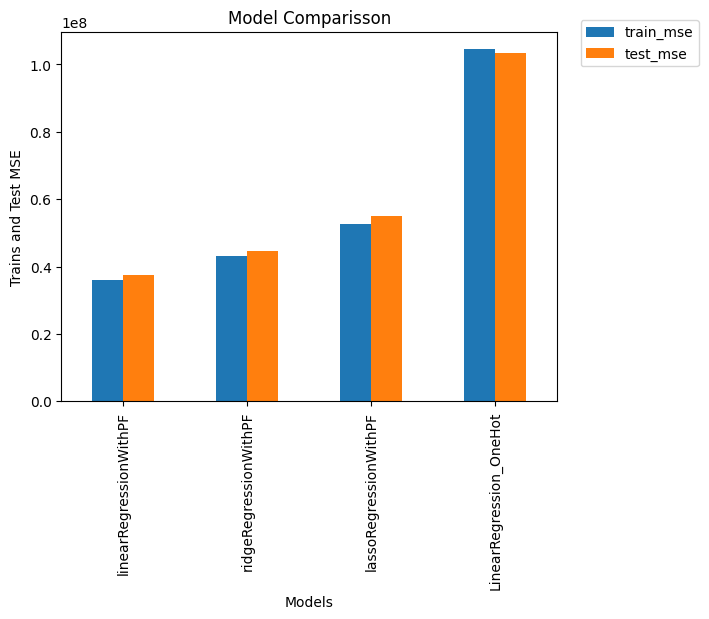

In [26]:
mp_results[['model', 'train_mse', 'test_mse']].sort_values('test_mse', ascending=True).plot(x='model', kind='bar', stacked=False)

plt.xlabel("Models")
plt.ylabel("Trains and Test MSE")
plt.title('Model Comparisson')
plt.legend(bbox_to_anchor=(1.3, 1.05))

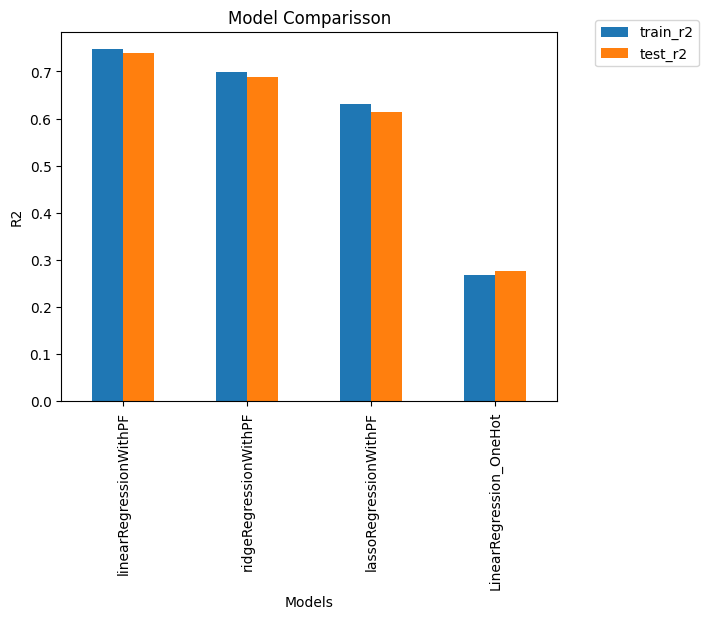

In [27]:
mp_results = pd.DataFrame(model_performance)
mp_results[['model', 'train_r2', 'test_r2']].sort_values('test_r2', ascending=False).plot(x='model', kind='bar', stacked=False)

plt.xlabel("Models")
plt.ylabel("R2")
plt.title('Model Comparisson')
plt.legend(bbox_to_anchor=(1.3, 1.05))

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

,Feature,Importance
0,model,5.837516e+07
1,year,5.300917e+07
2,manufacturer,2.127896e+07
3,odometer,1.878552e+07
4,transmission,5.358962e+06
5,fuel,3.231049e+06
6,state,1.682646e+06
7,condition,1.096754e+06
8,type,1.029418e+06
9,title_status,6.588836e+05


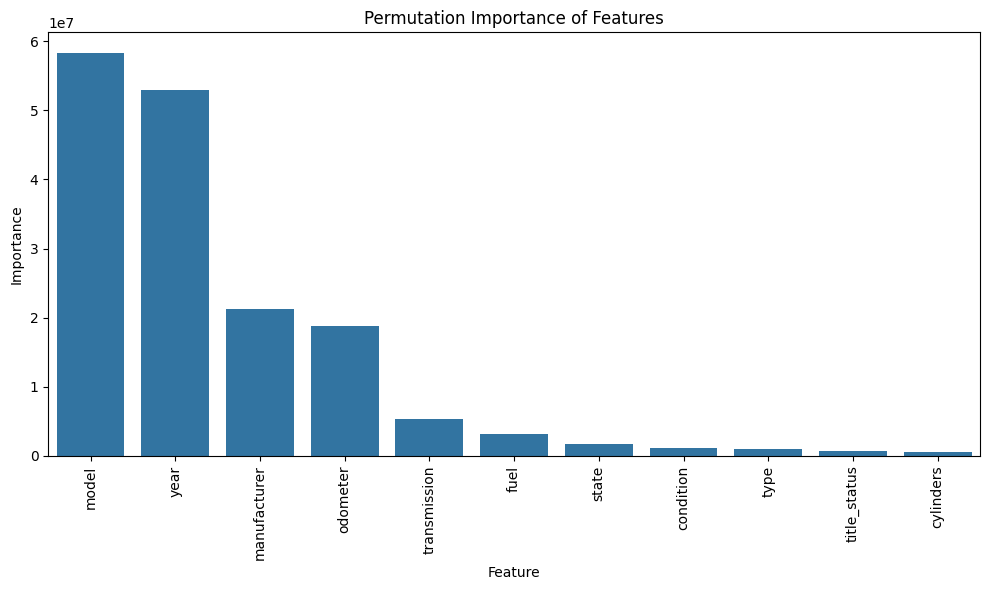

In [28]:
from sklearn.inspection import permutation_importance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

scoring = 'neg_mean_squared_error'  # single string, not a list

# Calculate permutation importance using the best estimator
r_multi = permutation_importance(
    grid_search.best_estimator_,
    X_test,
    y_test,
    n_repeats=30,
    random_state=21,
    scoring=scoring
)

# Extract importances and map to feature names
importances_tr = dict(
    zip(
        X_train.columns,
        r_multi.importances_mean
    )
)

# Sort importances descending
importances_tr = dict(sorted(importances_tr.items(), key=lambda x: x[1], reverse=True))

# Create DataFrame for visualization
import_df = pd.DataFrame({
    'Feature': list(importances_tr.keys()),
    'Importance': list(importances_tr.values())
})

display(import_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=import_df, x='Feature', y='Importance')

plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Permutation Importance of Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


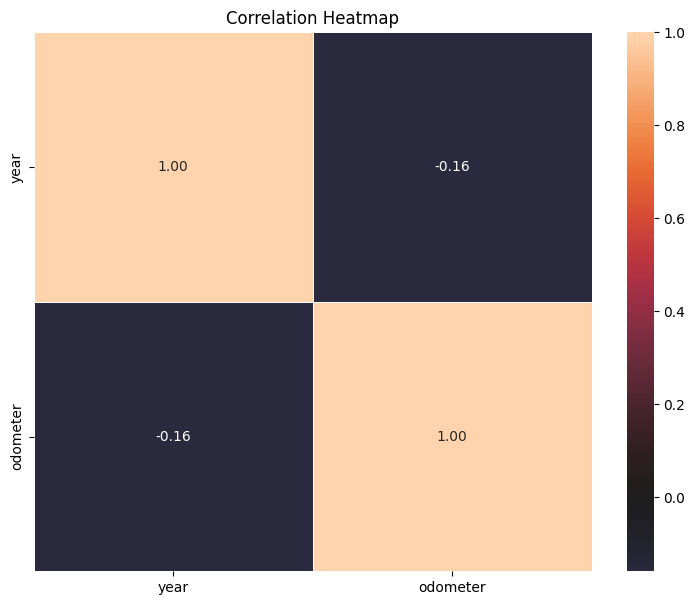

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

features_importance = ["model", "year", "manufacturer", "odometer", "transmission", "fuel"]

# Separate features and target
df_subset = df_no_outliers[features_importance].copy()

# Identify categorical columns among features (except price, year, odometer, cylinders)
# Assuming 'model' and 'fuel' are categorical:
categorical_cols = ['model', 'fuel', 'manufacturer']

# One-hot encode categorical columns using pandas get_dummies (simpler)
df_encoded = pd.get_dummies(df_subset, columns=categorical_cols, drop_first=True)

# Now compute correlations (price will be correlated with all numeric and one-hot columns)
corr_matrix = df_encoded.select_dtypes(include=[np.number]).corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(9,7))
sns.heatmap(
    corr_matrix, 
    center=0, 
    linewidth=0.7, 
    annot=True,
    fmt=".2f"
).set(title='Correlation Heatmap')
plt.show()


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [34]:
df = df_no_outliers.copy()

df.sample(10)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,state
80633,5295,2006,subaru,Impreza,good,4.0,gas,169485.0,clean,automatic,wagon,co
179524,4500,2000,toyota,Tundra,good,8.0,gas,230000.0,clean,automatic,truck,me
261265,44999,1986,unknown,Am,like new,8.0,diesel,22000.0,clean,automatic,offroad,nm
132103,18700,2006,ram,2500,salvage,6.0,diesel,192000.0,salvage,automatic,pickup,id
99033,25000,2019,unknown,Polaris,excellent,6.0,gas,18000.0,clean,manual,unknown,fl
159444,30973,2016,bmw,X5,excellent,6.0,gas,40047.0,clean,automatic,SUV,ia
390587,16995,2015,acura,Tlx,good,6.0,gas,49467.0,clean,automatic,sedan,va
9990,8499,2011,mazda,3,good,4.0,gas,123000.0,clean,automatic,sedan,az
104618,12500,1949,ford,Custom,good,8.0,gas,12345.0,clean,manual,sedan,fl
146819,4250,2003,honda,Civic,good,6.0,gas,157690.0,clean,automatic,unknown,il


In [36]:
min_year = min(df['year'])
max_year = max(df['year'])
year_bins = [min_year, max_year - 45 , max_year - 20 , max_year - 10, max_year - 5, max_year]
year_categories = ['Vintage', 'Antique' , 'Classic', 'Modern', 'New Model']

df['year_category'] = pd.cut(
        df['year'], 
        year_bins,  
        labels = year_categories,  
        include_lowest = True
) 

# Odometer categories
max_odometer = max(df['odometer'])
odometer_bins = [ 0, 15000 , 40000 , 70000, max_odometer]
odometer_categories = ['New', 'Low' , 'Medium', 'High']

df['odometer_category'] = pd.cut(
        df['odometer'], 
        odometer_bins,  
        labels = odometer_categories,  
        include_lowest = True
) 

display(df.sample(10))
display(year_bins)
display(odometer_bins)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,state,year_category,odometer_category
122242,24500,2015,mercedes-benz,Benz,good,6.0,gas,69055.0,clean,automatic,wagon,ga,Modern,Medium
223860,35998,2019,chevrolet,Colorado,good,6.0,gas,11758.0,clean,automatic,truck,mt,New Model,New
408090,12893,2015,buick,Verano,good,4.0,gas,57657.0,clean,automatic,sedan,wa,Modern,Medium
291797,6500,2008,audi,A4,excellent,6.0,gas,139000.0,clean,automatic,sedan,oh,Classic,High
62169,3500,2002,mercedes-benz,C240,good,6.0,gas,201000.0,clean,automatic,unknown,ca,Antique,High
79524,16495,2014,chevrolet,Camaro,good,6.0,gas,117481.0,clean,automatic,coupe,co,Modern,High
3240,18900,2015,ford,F250,good,6.0,gas,180000.0,clean,automatic,unknown,al,Modern,High
272060,5000,2006,audi,A4,good,4.0,gas,166895.0,clean,manual,unknown,ny,Classic,High
31073,7500,1996,toyota,4Runner,good,6.0,gas,250000.0,clean,manual,truck,ca,Antique,High
121314,6998,2009,subaru,Forester,good,4.0,gas,179365.0,clean,automatic,unknown,ga,Classic,High


[1900, 1977, 2002, 2012, 2017, 2022]

[0, 15000, 40000, 70000, 10000000.0]

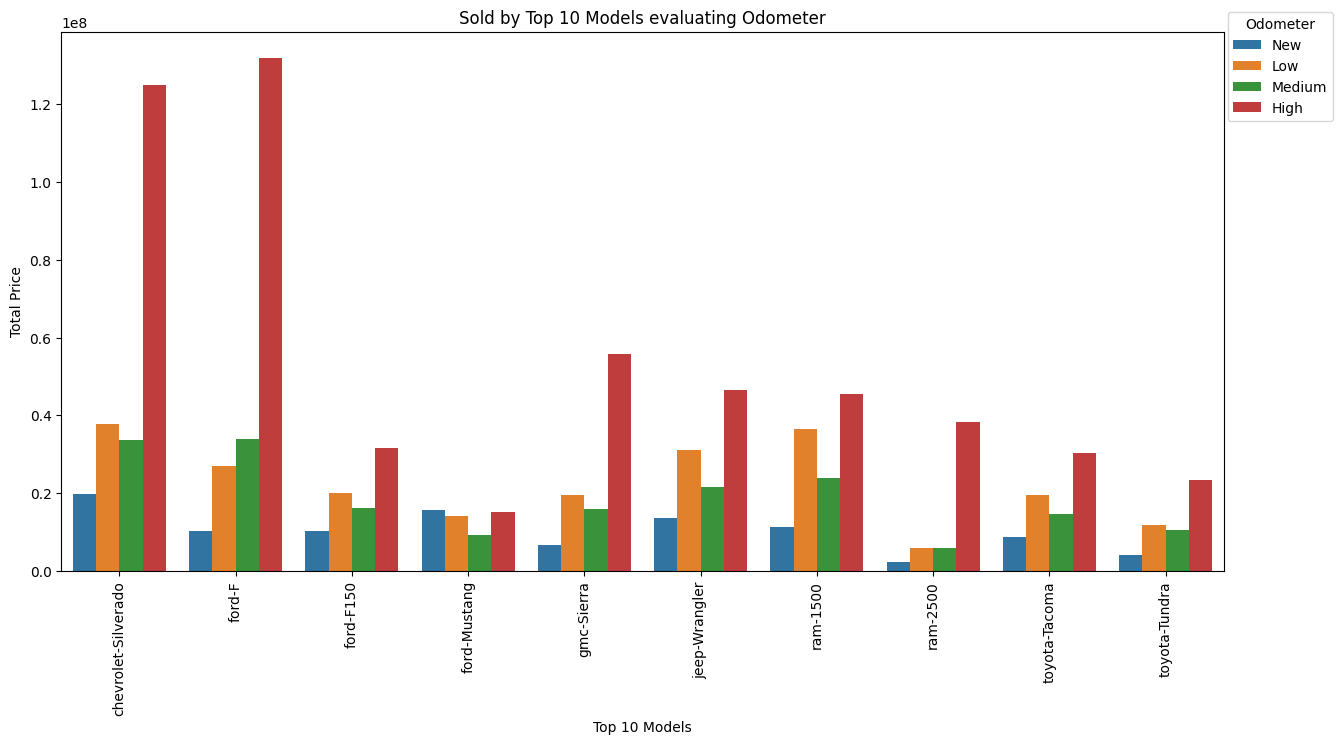

In [37]:
df_new = df.copy()
df_new['man_model'] = df_new['manufacturer'] + '-' + df_new['model']

df_topmodels = df.groupby(['manufacturer', 'model'])['price'].agg(sum).reset_index().sort_values('price', ascending=False).iloc[0:10]
df_topmodels['man_model'] = df_topmodels['manufacturer'] + '-' + df_topmodels['model']

top_models = df_topmodels['man_model'].unique()

df_data = df_new.query('man_model in(@top_models)').groupby(['man_model', 'odometer_category'])['price'].sum().reset_index()


plt.figure(figsize = (15, 7))
sns.barplot(df_data, x = "man_model", y="price", hue = "odometer_category").set(title = "Sold by Top 10 Models evaluating Odometer")
plt.xticks(rotation = 90)
plt.xlabel('Top 10 Models')
plt.ylabel('Total Price')
plt.legend(bbox_to_anchor=(1.1, 1.05), title="Odometer")
plt.show()

([<matplotlib.patches.Wedge at 0x17f96a810>,
 [Text(0.8793897547290854, 0.6608128776571468, 'chevrolet-Silverado'),
  Text(-0.34997969842587784, 1.0428394942126673, 'ford-F'),
  Text(-1.0530872593209684, 0.3178163373016743, 'ram-1500'),
  Text(-1.0169816994669818, -0.41922335687464984, 'jeep-Wrangler'),
  Text(-0.5769817821742542, -0.9365319124509435, 'gmc-Sierra'),
  Text(-0.03063643612020883, -1.0995732848618378, 'ford-F150'),
  Text(0.4509199339338556, -1.0033300619343006, 'toyota-Tacoma'),
  Text(0.7902384429829807, -0.7651948792509229, 'ford-Mustang'),
  Text(0.9892826209640727, -0.4809572703041873, 'ram-2500'),
  Text(1.0878736162705258, -0.16288337859489807, 'toyota-Tundra')],
 [Text(0.4796671389431374, 0.3604433878129891, '20.5%'),
  Text(-0.19089801732320608, 0.5688215422978184, '19.3%'),
  Text(-0.5744112323568918, 0.17335436580091323, '11.1%'),
  Text(-0.5547172906183536, -0.2286672855679908, '10.7%'),
  Text(-0.31471733573141136, -0.5108355886096055, '9.3%'),
  Text(-0.0167

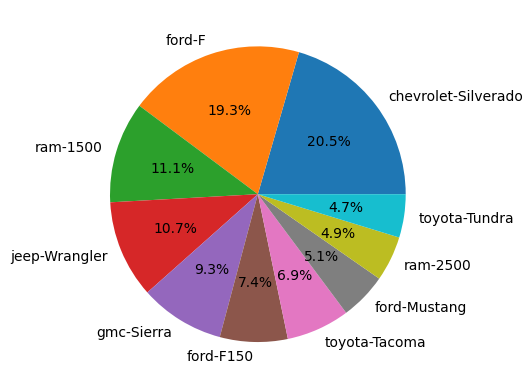

In [38]:
df_2018_top = df_data.groupby('man_model')['price'].agg(sum).reset_index().sort_values('price', ascending=False)

plt.pie(
    df_2018_top['price'], 
	labels= df_2018_top['man_model'], 
	autopct='%1.1f%%'
)